In [1]:
#Joey
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from math import e
from random import sample
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
esg2016 = pd.read_csv('sp_500_esg_scores_2016.csv', index_col=0)
esg2017 = pd.read_csv('sp_500_esg_scores_2017.csv', index_col=0)
esg2018 = pd.read_csv('sp_500_esg_scores_2018.csv', index_col=0)
esg2019 = pd.read_csv('sp_500_esg_scores_2019.csv', index_col=0)
esg2020 = pd.read_csv('sp_500_esg_scores_2020.csv', index_col=0)
esg2021 = pd.read_csv('sp_500_esg_scores_2021.csv', index_col=0)
total_revenue = pd.read_csv('sp_500_total_revenue.csv', index_col=0)
county = pd.read_csv('sp_500_headquarters_country.csv', index_col=0)

In [3]:
esg2016 = pd.concat([esg2016, county['Country of Headquarters']], axis=1, join='inner')
esg2017 = pd.concat([esg2017, county['Country of Headquarters']], axis=1, join='inner')
esg2018 = pd.concat([esg2018, county['Country of Headquarters']], axis=1, join='inner')
esg2019 = pd.concat([esg2019, county['Country of Headquarters']], axis=1, join='inner')
esg2020 = pd.concat([esg2020, county['Country of Headquarters']], axis=1, join='inner')
esg2021 = pd.concat([esg2021, county['Country of Headquarters']], axis=1, join='inner')

In [4]:
combdf=pd.DataFrame()
combdf['Revenue'] = pd.concat([total_revenue['2016'],total_revenue['2017'],total_revenue['2018'],total_revenue['2019'],total_revenue['2020'],total_revenue['2021']],ignore_index=True)
combdf['Environmental'] = pd.concat([esg2016['Environmental Pillar Score'],esg2017['Environmental Pillar Score'],esg2018['Environmental Pillar Score'],esg2019['Environmental Pillar Score'],esg2020['Environmental Pillar Score'],esg2021['Environmental Pillar Score']],ignore_index=True)
combdf['Social'] = pd.concat([esg2016['Social Pillar Score'],esg2017['Social Pillar Score'],esg2018['Social Pillar Score'],esg2019['Social Pillar Score'],esg2020['Social Pillar Score'],esg2021['Social Pillar Score']],ignore_index=True)
combdf['Governance'] = pd.concat([esg2016['Governance Pillar Score'],esg2017['Governance Pillar Score'],esg2018['Governance Pillar Score'],esg2019['Governance Pillar Score'],esg2020['Governance Pillar Score'],esg2021['Governance Pillar Score']],ignore_index=True)
combdf=combdf.astype(float)
combdf['Country'] = pd.concat([esg2016['Country of Headquarters'],esg2017['Country of Headquarters'],esg2018['Country of Headquarters'],esg2019['Country of Headquarters'],esg2020['Country of Headquarters'],esg2021['Country of Headquarters']],ignore_index=True)
print(combdf)

        Revenue  Environmental     Social  Governance  \
0     30109.000      85.960218  95.147458   79.882889   
1      2685.900      30.054673  31.722409   60.465017   
2     20853.000      58.257135  85.968248   80.465921   
3     25638.000      65.490633  88.756966   61.789019   
4       445.304       0.000000  24.706148   25.957053   
...         ...            ...        ...         ...   
3013   6584.000      88.302439  87.524782   53.613973   
3014   5627.000            NaN        NaN         NaN   
3015   7836.200      42.206852  80.996962   63.015064   
3016        NaN      41.078343  46.071616   64.295739   
3017   7776.000      64.227996  76.768397   56.937934   

                       Country  
0     United States of America  
1     United States of America  
2     United States of America  
3     United States of America  
4     United States of America  
...                        ...  
3013  United States of America  
3014  United States of America  
3015  United State

In [5]:
#To remove rows with empty cells 
combdf.dropna(subset=['Revenue'], inplace=True)
combdf.dropna(subset=['Social'], inplace=True)
combdf

,Revenue,Environmental,Social,Governance,Country
0,30109.000,85.960218,95.147458,79.882889,United States of America
1,2685.900,30.054673,31.722409,60.465017,United States of America
2,20853.000,58.257135,85.968248,80.465921,United States of America
3,25638.000,65.490633,88.756966,61.789019,United States of America
4,445.304,0.000000,24.706148,25.957053,United States of America
...,...,...,...,...,...
3010,3763.664,75.047258,78.085744,71.039307,United States of America
3012,5195.000,75.606710,84.010193,94.148284,United States of America
3013,6584.000,88.302439,87.524782,53.613973,United States of America
3015,7836.200,42.206852,80.996962,63.015064,United States of America


In [6]:
df_Ireland=combdf[ (combdf['Country'] == 'Ireland; Republic of') ]
df_UK=combdf[ (combdf['Country'] == 'United Kingdom') ]
df_US=combdf[ (combdf['Country'] == 'United States of America') ]

# Spliting data into train and test data

In [7]:
df_train, df_test = train_test_split(combdf , test_size=0.2, random_state=1)
df_Ireland_train, df_Ireland_test = train_test_split(df_Ireland , test_size=0.2, random_state=1)
df_UK_train, df_UK_test = train_test_split(df_UK , test_size=0.2, random_state=1)
df_US_train, df_US_test = train_test_split(df_US , test_size=0.2, random_state=1)

# Predictive model

In [8]:
model1 = smf.ols('Revenue ~ Environmental', data=df_train).fit()
print(model1.summary())

df_test['Revenue_pred'] = model1.predict(df_test)
df_test['SSD'] = (df_test['Revenue'] - df_test['Revenue_pred'])**2
SSD = df_test['SSD'].sum()
RSE = np.sqrt(SSD / 537)   # n = 539, p = 1
Revenuemean = np.mean(df_test['Revenue'])
error = RSE / Revenuemean

r1=0.064
f1=147.6
e1=error

print(f'Error = {np.round(error, 4)*100}%')

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           6.83e-33
Time:                        17:39:49   Log-Likelihood:                -26156.
No. Observations:                2152   AIC:                         5.232e+04
Df Residuals:                    2150   BIC:                         5.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -772.5631   2267.730     -0.341

In [9]:
model2 = smf.ols('Revenue ~ Social', data=df_train).fit()
print(model2.summary())

df_test['Revenue_pred'] = model2.predict(df_test)
df_test['SSD'] = (df_test['Revenue'] - df_test['Revenue_pred'])**2
SSD = df_test['SSD'].sum()
RSE = np.sqrt(SSD / 537)   # n = 539, p = 1
Revenuemean = np.mean(df_test['Revenue'])
error = RSE / Revenuemean

r2=0.037
f2=83.49
e2=error

print(f'Error = {np.round(error, 4)*100}%')

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     83.49
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.44e-19
Time:                        17:39:50   Log-Likelihood:                -26187.
No. Observations:                2152   AIC:                         5.238e+04
Df Residuals:                    2150   BIC:                         5.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6354.9308   3471.376     -1.831      0.0

In [10]:
model3 = smf.ols('Revenue ~ Governance', data=df_train).fit()
print(model3.summary())

df_test['Revenue_pred'] = model3.predict(df_test)
df_test['SSD'] = (df_test['Revenue'] - df_test['Revenue_pred'])**2
SSD = df_test['SSD'].sum()
RSE = np.sqrt(SSD / 537)   # n = 539, p = 1
Revenuemean = np.mean(df_test['Revenue'])
error = RSE / Revenuemean

r3=0.023
f3=49.83
e3=error

print(f'Error = {np.round(error, 4)*100}%')

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     49.83
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           2.26e-12
Time:                        17:39:50   Log-Likelihood:                -26203.
No. Observations:                2152   AIC:                         5.241e+04
Df Residuals:                    2150   BIC:                         5.242e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    455.6796   3486.656      0.131      0.8

In [11]:
model4 = smf.ols('Revenue ~ Environmental+Social', data=df_train).fit()
print(model4.summary())

df_test['Revenue_pred'] = model4.predict(df_test)
df_test['SSD'] = (df_test['Revenue'] - df_test['Revenue_pred'])**2
SSD = df_test['SSD'].sum()
RSE = np.sqrt(SSD / 536)   # n = 539, p = 2
Revenuemean = np.mean(df_test['Revenue'])
error = RSE / Revenuemean


r4=0.065
f4=74.57
e4=error

print(f'Error = {np.round(error, 4)*100}%')

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     74.57
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           4.88e-32
Time:                        17:39:50   Log-Likelihood:                -26156.
No. Observations:                2152   AIC:                         5.232e+04
Df Residuals:                    2149   BIC:                         5.233e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3962.0896   3435.405     -1.153

In [12]:
model5 = smf.ols('Revenue ~ Environmental+Governance', data=df_train).fit()
print(model5.summary())

df_test['Revenue_pred'] = model5.predict(df_test)
df_test['SSD'] = (df_test['Revenue'] - df_test['Revenue_pred'])**2
SSD = df_test['SSD'].sum()
RSE = np.sqrt(SSD / 536)   # n = 539, p = 2
Revenuemean = np.mean(df_test['Revenue'])
error = RSE / Revenuemean


r5=0.070
f5=80.29
e5=error

print(f'Error = {np.round(error, 4)*100}%')

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     80.29
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           2.36e-34
Time:                        17:39:51   Log-Likelihood:                -26150.
No. Observations:                2152   AIC:                         5.231e+04
Df Residuals:                    2149   BIC:                         5.232e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.038e+04   3558.535     -2.916

In [13]:
model6 = smf.ols('Revenue ~ Social+Governance', data=df_train).fit()
print(model6.summary())

df_test['Revenue_pred'] = model6.predict(df_test)
df_test['SSD'] = (df_test['Revenue'] - df_test['Revenue_pred'])**2
SSD = df_test['SSD'].sum()
RSE = np.sqrt(SSD / 536)   # n = 539, p = 2
Revenuemean = np.mean(df_test['Revenue'])
error = RSE / Revenuemean

r6=0.048
f6=54.20
e6=error

print(f'Error = {np.round(error, 4)*100}%')

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     54.20
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.08e-23
Time:                        17:39:51   Log-Likelihood:                -26175.
No. Observations:                2152   AIC:                         5.236e+04
Df Residuals:                    2149   BIC:                         5.237e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.866e+04   4269.228     -4.371      0.0

In [14]:
model7 = smf.ols('Revenue ~ Environmental+Social+Governance', data=df_train).fit()
print(model7.summary())

df_test['Revenue_pred'] = model7.predict(df_test)
df_test['SSD'] = (df_test['Revenue'] - df_test['Revenue_pred'])**2
SSD = df_test['SSD'].sum()
RSE = np.sqrt(SSD / 535)   # n = 539, p = 3
Revenuemean = np.mean(df_test['Revenue'])
error = RSE / Revenuemean

r7=0.070
f7=53.88
e7=error

print(f'Error = {np.round(error, 4)*100}%')

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     53.88
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.42e-33
Time:                        17:39:52   Log-Likelihood:                -26150.
No. Observations:                2152   AIC:                         5.231e+04
Df Residuals:                    2148   BIC:                         5.233e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.286e+04   4298.646     -2.991

In [15]:
summary=pd.DataFrame()
summary['Adjusted R']=(r1,r2,r3,r4,r5,r6,r7)
summary['Error']=(e1,e2,e3,e4,e5,e6,e7)
summary['F-statistic']=(f1,f2,f3,f4,f5,f6,f7)
summary

,Adjusted R,Error,F-statistic
0,0.064,1.856042,147.60
1,0.037,1.890123,83.49
2,0.023,1.911290,49.83
3,0.065,1.858370,74.57
4,0.070,1.857787,80.29
5,0.048,1.888809,54.20
6,0.070,1.860133,53.88


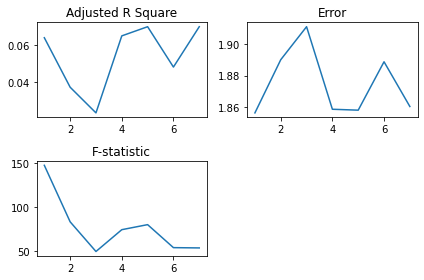

In [16]:
x = [1,2,3,4,5,6,7]
y1 = summary['Adjusted R']

  

y2 = summary['Error']


y3 = summary['F-statistic']
plot1 = plt.subplot2grid((4, 4), (0, 0), rowspan=2, colspan=2)
plot2 = plt.subplot2grid((4, 4), (0, 2), rowspan=2, colspan=2)
plot3 = plt.subplot2grid((4, 4), (2, 0), rowspan=2, colspan=2)
  

  
plot1.plot(x, y1)
plot1.set_title("Adjusted R Square")
  

plot2.plot(x, y2)
plot2.set_title("Error")

plot3.plot(x, y3)
plot3.set_title("F-statistic")


plt.tight_layout()
# Combine all the operations and display
plt.show()

By compairing Adujusted R-square, Error and F-statistic of each model, the 1st model is the best choice.

The best prediction model is: Revenue = -772.5631 + 459.2224 * Environmental Pillar Score 

# Ireland

In [17]:

model1 = smf.ols('Revenue ~ Environmental', data=df_Ireland_train).fit()
print(model1.summary())

df_Ireland_test['Revenue_pred'] = model1.predict(df_Ireland_test)
df_Ireland_test['SSD'] = (df_Ireland_test['Revenue'] - df_Ireland_test['Revenue_pred'])**2
SSD = df_Ireland_test['SSD'].sum()
RSE = np.sqrt(SSD / 10)   # n = 12, p = 1
Revenuemean = np.mean(df_Ireland_test['Revenue'])
error = RSE / Revenuemean

r1=0.453
f1=36.55
e1=error

print(f'Error = {np.round(error, 4)*100}%')

model2 = smf.ols('Revenue ~ Social', data=df_Ireland_train).fit()
print(model2.summary())

df_Ireland_test['Revenue_pred'] = model2.predict(df_Ireland_test)
df_Ireland_test['SSD'] = (df_Ireland_test['Revenue'] - df_Ireland_test['Revenue_pred'])**2
SSD = df_Ireland_test['SSD'].sum()
RSE = np.sqrt(SSD / 10)   # n = 12, p = 1
Revenuemean = np.mean(df_Ireland_test['Revenue'])
error = RSE / Revenuemean

r2=0.305
f2=19.90
e2=error

print(f'Error = {np.round(error, 4)*100}%')

model3 = smf.ols('Revenue ~ Governance', data=df_Ireland_train).fit()
print(model3.summary())

df_Ireland_test['Revenue_pred'] = model3.predict(df_Ireland_test)
df_Ireland_test['SSD'] = (df_Ireland_test['Revenue'] - df_Ireland_test['Revenue_pred'])**2
SSD = df_Ireland_test['SSD'].sum()
RSE = np.sqrt(SSD / 10)   # n = 12, p = 1
Revenuemean = np.mean(df_Ireland_test['Revenue'])
error = RSE / Revenuemean

r3=0.056
f3=3.574
e3=error

print(f'Error = {np.round(error, 4)*100}%')

model4 = smf.ols('Revenue ~ Environmental+Social', data=df_Ireland_train).fit()
print(model4.summary())

df_Ireland_test['Revenue_pred'] = model4.predict(df_Ireland_test)
df_Ireland_test['SSD'] = (df_Ireland_test['Revenue'] - df_Ireland_test['Revenue_pred'])**2
SSD = df_Ireland_test['SSD'].sum()
RSE = np.sqrt(SSD / 9)   # n = 12, p = 2
Revenuemean = np.mean(df_Ireland_test['Revenue'])
error = RSE / Revenuemean


r4=0.440
f4=17.86
e4=error

print(f'Error = {np.round(error, 4)*100}%')

model5 = smf.ols('Revenue ~ Environmental+Governance', data=df_Ireland_train).fit()
print(model5.summary())

df_Ireland_test['Revenue_pred'] = model5.predict(df_Ireland_test)
df_Ireland_test['SSD'] = (df_Ireland_test['Revenue'] - df_Ireland_test['Revenue_pred'])**2
SSD = df_Ireland_test['SSD'].sum()
RSE = np.sqrt(SSD / 9)   # n = 12, p = 2
Revenuemean = np.mean(df_Ireland_test['Revenue'])
error = RSE / Revenuemean


r5=0.517
f5=23.99
e5=error

print(f'Error = {np.round(error, 4)*100}%')

model6 = smf.ols('Revenue ~ Social+Governance', data=df_Ireland_train).fit()
print(model6.summary())

df_Ireland_test['Revenue_pred'] = model6.predict(df_Ireland_test)
df_Ireland_test['SSD'] = (df_Ireland_test['Revenue'] - df_Ireland_test['Revenue_pred'])**2
SSD = df_Ireland_test['SSD'].sum()
RSE = np.sqrt(SSD / 9)   # n = 12, p = 2
Revenuemean = np.mean(df_Ireland_test['Revenue'])
error = RSE / Revenuemean

r6=0.336
f6=11.87
e6=error

print(f'Error = {np.round(error, 4)*100}%')

model7 = smf.ols('Revenue ~ Environmental+Social+Governance', data=df_Ireland_train).fit()
print(model7.summary())

df_Ireland_test['Revenue_pred'] = model7.predict(df_Ireland_test)
df_Ireland_test['SSD'] = (df_Ireland_test['Revenue'] - df_Ireland_test['Revenue_pred'])**2
SSD = df_Ireland_test['SSD'].sum()
RSE = np.sqrt(SSD / 8)   # n = 12,, p = 3
Revenuemean = np.mean(df_Ireland_test['Revenue'])
error = RSE / Revenuemean

r7=0.506
f7=15.69
e7=error

print(f'Error = {np.round(error, 4)*100}%')

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     36.55
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           3.41e-07
Time:                        17:39:59   Log-Likelihood:                -460.91
No. Observations:                  44   AIC:                             925.8
Df Residuals:                      42   BIC:                             929.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3104.5951   3839.797     -0.809

In [18]:
summary=pd.DataFrame()
summary['Adjusted R']=(r1,r2,r3,r4,r5,r6,r7)
summary['Error']=(e1,e2,e3,e4,e5,e6,e7)
summary['F-statistic']=(f1,f2,f3,f4,f5,f6,f7)
summary

,Adjusted R,Error,F-statistic
0,0.453,1.011411,36.550
1,0.305,1.080516,19.900
2,0.056,1.056739,3.574
3,0.440,1.065517,17.860
4,0.517,0.965195,23.990
5,0.336,1.033184,11.870
6,0.506,1.029103,15.690


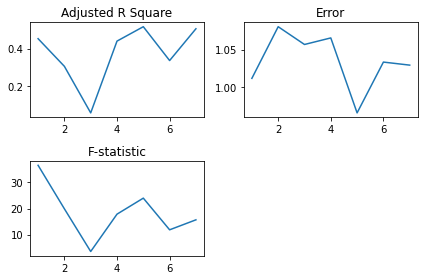

In [19]:
x = [1,2,3,4,5,6,7]
y1 = summary['Adjusted R']
y2 = summary['Error']
y3 = summary['F-statistic']

plot1 = plt.subplot2grid((4, 4), (0, 0), rowspan=2, colspan=2)
plot2 = plt.subplot2grid((4, 4), (0, 2), rowspan=2, colspan=2)
plot3 = plt.subplot2grid((4, 4), (2, 0), rowspan=2, colspan=2)
  
plot1.plot(x, y1)
plot1.set_title("Adjusted R Square")

plot2.plot(x, y2)
plot2.set_title("Error")

plot3.plot(x, y3)
plot3.set_title("F-statistic")


plt.tight_layout()
plt.show()

By compairing Adujusted R-square, Error and F-statistic of each model, the 5th model is the best choice.

The best prediction model for Ireland is: Revenue = -12690 + 349.2537 * Environmental Pillar Score + 175.7489 * Governance Pillar Score

# United Kingdom

In [21]:

model1 = smf.ols('Revenue ~ Environmental', data=df_UK_train).fit()
print(model1.summary())

df_UK_test['Revenue_pred'] = model1.predict(df_UK_test)
df_UK_test['SSD'] = (df_UK_test['Revenue'] - df_UK_test['Revenue_pred'])**2
SSD = df_UK_test['SSD'].sum()
RSE = np.sqrt(SSD / 4)   # n = 6, p = 1
Revenuemean = np.mean(df_UK_test['Revenue'])
error = RSE / Revenuemean

r1=0.018
f1=1.419
e1=error

print(f'Error = {np.round(error, 4)*100}%')

model2 = smf.ols('Revenue ~ Social', data=df_UK_train).fit()
print(model2.summary())

df_UK_test['Revenue_pred'] = model2.predict(df_UK_test)
df_UK_test['SSD'] = (df_UK_test['Revenue'] - df_UK_test['Revenue_pred'])**2
SSD = df_UK_test['SSD'].sum()
RSE = np.sqrt(SSD / 4)   # n = 6, p = 1
Revenuemean = np.mean(df_UK_test['Revenue'])
error = RSE / Revenuemean

r2=-0.014
f2=0.6760
e2=error

print(f'Error = {np.round(error, 4)*100}%')

model3 = smf.ols('Revenue ~ Governance', data=df_UK_train).fit()
print(model3.summary())

df_UK_test['Revenue_pred'] = model3.predict(df_UK_test)
df_UK_test['SSD'] = (df_UK_test['Revenue'] - df_UK_test['Revenue_pred'])**2
SSD = df_UK_test['SSD'].sum()
RSE = np.sqrt(SSD / 4)   # n = 6, p = 1
Revenuemean = np.mean(df_UK_test['Revenue'])
error = RSE / Revenuemean

r3=0.305
f3=11.08
e3=error

print(f'Error = {np.round(error, 4)*100}%')

model4 = smf.ols('Revenue ~ Environmental+Social', data=df_UK_train).fit()
print(model4.summary())

df_UK_test['Revenue_pred'] = model4.predict(df_UK_test)
df_UK_test['SSD'] = (df_UK_test['Revenue'] - df_UK_test['Revenue_pred'])**2
SSD = df_UK_test['SSD'].sum()
RSE = np.sqrt(SSD / 3)   # n = 6, p = 2
Revenuemean = np.mean(df_UK_test['Revenue'])
error = RSE / Revenuemean


r4=-0.021
f4=0.7689
e4=error

print(f'Error = {np.round(error, 4)*100}%')

model5 = smf.ols('Revenue ~ Environmental+Governance', data=df_UK_train).fit()
print(model5.summary())

df_UK_test['Revenue_pred'] = model5.predict(df_UK_test)
df_UK_test['SSD'] = (df_UK_test['Revenue'] - df_UK_test['Revenue_pred'])**2
SSD = df_UK_test['SSD'].sum()
RSE = np.sqrt(SSD / 3)   # n = 6, p = 2
Revenuemean = np.mean(df_UK_test['Revenue'])
error = RSE / Revenuemean


r5=0.363
f5=7.548
e5=error

print(f'Error = {np.round(error, 4)*100}%')

model6 = smf.ols('Revenue ~ Social+Governance', data=df_UK_train).fit()
print(model6.summary())

df_UK_test['Revenue_pred'] = model6.predict(df_UK_test)
df_UK_test['SSD'] = (df_UK_test['Revenue'] - df_UK_test['Revenue_pred'])**2
SSD = df_UK_test['SSD'].sum()
RSE = np.sqrt(SSD / 3)   # n = 6, p = 2
Revenuemean = np.mean(df_UK_test['Revenue'])
error = RSE / Revenuemean

r6=0.325
f6=6.545
e6=error

print(f'Error = {np.round(error, 4)*100}%')

model7 = smf.ols('Revenue ~ Environmental+Social+Governance', data=df_UK_train).fit()
print(model7.summary())

df_UK_test['Revenue_pred'] = model7.predict(df_UK_test)
df_UK_test['SSD'] = (df_UK_test['Revenue'] - df_UK_test['Revenue_pred'])**2
SSD = df_UK_test['SSD'].sum()
RSE = np.sqrt(SSD / 2)   # n = 6,, p = 3
Revenuemean = np.mean(df_UK_test['Revenue'])
error = RSE / Revenuemean

r7=0.335
f7=4.870
e7=error

print(f'Error = {np.round(error, 4)*100}%')

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.419
Date:                Mon, 05 Dec 2022   Prob (F-statistic):              0.246
Time:                        17:40:24   Log-Likelihood:                -260.02
No. Observations:                  24   AIC:                             524.0
Df Residuals:                      22   BIC:                             526.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6146.2871   8203.710      0.749

In [22]:
summary=pd.DataFrame()
summary['Adjusted R']=(r1,r2,r3,r4,r5,r6,r7)
summary['Error']=(e1,e2,e3,e4,e5,e6,e7)
summary['F-statistic']=(f1,f2,f3,f4,f5,f6,f7)
summary

,Adjusted R,Error,F-statistic
0,0.018,0.693597,1.4190
1,-0.014,0.741401,0.6760
2,0.305,0.890813,11.0800
3,-0.021,0.763633,0.7689
4,0.363,0.938249,7.5480
5,0.325,0.998778,6.5450
6,0.335,1.120773,4.8700


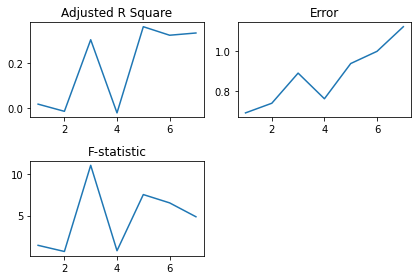

In [23]:
x = [1,2,3,4,5,6,7]
y1 = summary['Adjusted R']
y2 = summary['Error']
y3 = summary['F-statistic']

plot1 = plt.subplot2grid((4, 4), (0, 0), rowspan=2, colspan=2)
plot2 = plt.subplot2grid((4, 4), (0, 2), rowspan=2, colspan=2)
plot3 = plt.subplot2grid((4, 4), (2, 0), rowspan=2, colspan=2)
  
plot1.plot(x, y1)
plot1.set_title("Adjusted R Square")

plot2.plot(x, y2)
plot2.set_title("Error")

plot3.plot(x, y3)
plot3.set_title("F-statistic")


plt.tight_layout()
plt.show()

By compairing Adujusted R-square, Error and F-statistic of each model, the 3rd model is the best choice.

The best prediction model for UK is: Revenue = -3188.6513 + 300.1419 * Governance Pillar Score

# United States of America 

In [24]:

model1 = smf.ols('Revenue ~ Environmental', data=df_US_train).fit()
print(model1.summary())

df_US_test['Revenue_pred'] = model1.predict(df_US_test)
df_US_test['SSD'] = (df_US_test['Revenue'] - df_US_test['Revenue_pred'])**2
SSD = df_US_test['SSD'].sum()
RSE = np.sqrt(SSD / 512)   # n = 514, p = 1
Revenuemean = np.mean(df_US_test['Revenue'])
error = RSE / Revenuemean

r1=0.072
f1=161.3
e1=error

print(f'Error = {np.round(error, 4)*100}%')

model2 = smf.ols('Revenue ~ Social', data=df_US_train).fit()
print(model2.summary())

df_US_test['Revenue_pred'] = model2.predict(df_US_test)
df_US_test['SSD'] = (df_US_test['Revenue'] - df_US_test['Revenue_pred'])**2
SSD = df_US_test['SSD'].sum()
RSE = np.sqrt(SSD / 512)   # n = 514, p = 1
Revenuemean = np.mean(df_US_test['Revenue'])
error = RSE / Revenuemean

r2=0.043
f2=92.40
e2=error

print(f'Error = {np.round(error, 4)*100}%')

model3 = smf.ols('Revenue ~ Governance', data=df_US_train).fit()
print(model3.summary())

df_US_test['Revenue_pred'] = model3.predict(df_US_test)
df_US_test['SSD'] = (df_US_test['Revenue'] - df_US_test['Revenue_pred'])**2
SSD = df_US_test['SSD'].sum()
RSE = np.sqrt(SSD / 512)   # n = 514, p = 1
Revenuemean = np.mean(df_US_test['Revenue'])
error = RSE / Revenuemean

r3=0.020
f3=43.51
e3=error

print(f'Error = {np.round(error, 4)*100}%')

model4 = smf.ols('Revenue ~ Environmental+Social', data=df_US_train).fit()
print(model4.summary())

df_US_test['Revenue_pred'] = model4.predict(df_US_test)
df_US_test['SSD'] = (df_US_test['Revenue'] - df_US_test['Revenue_pred'])**2
SSD = df_US_test['SSD'].sum()
RSE = np.sqrt(SSD / 511)   # n = 514, p = 2
Revenuemean = np.mean(df_US_test['Revenue'])
error = RSE / Revenuemean


r4=0.073
f4=81.63
e4=error

print(f'Error = {np.round(error, 4)*100}%')

model5 = smf.ols('Revenue ~ Environmental+Governance', data=df_US_train).fit()
print(model5.summary())

df_US_test['Revenue_pred'] = model5.predict(df_US_test)
df_US_test['SSD'] = (df_US_test['Revenue'] - df_US_test['Revenue_pred'])**2
SSD = df_US_test['SSD'].sum()
RSE = np.sqrt(SSD / 511)   # n = 514, p = 2
Revenuemean = np.mean(df_US_test['Revenue'])
error = RSE / Revenuemean


r5=0.075
f5=84.52
e5=error

print(f'Error = {np.round(error, 4)*100}%')

model6 = smf.ols('Revenue ~ Social+Governance', data=df_US_train).fit()
print(model6.summary())

df_US_test['Revenue_pred'] = model6.predict(df_US_test)
df_US_test['SSD'] = (df_US_test['Revenue'] - df_US_test['Revenue_pred'])**2
SSD = df_US_test['SSD'].sum()
RSE = np.sqrt(SSD / 511)   # n = 514, p = 2
Revenuemean = np.mean(df_US_test['Revenue'])
error = RSE / Revenuemean

r6=0.050
f6=55.07
e6=error

print(f'Error = {np.round(error, 4)*100}%')

model7 = smf.ols('Revenue ~ Environmental+Social+Governance', data=df_US_train).fit()
print(model7.summary())

df_US_test['Revenue_pred'] = model7.predict(df_US_test)
df_US_test['SSD'] = (df_US_test['Revenue'] - df_US_test['Revenue_pred'])**2
SSD = df_US_test['SSD'].sum()
RSE = np.sqrt(SSD / 510)   # n = 514,, p = 3
Revenuemean = np.mean(df_US_test['Revenue'])
error = RSE / Revenuemean

r7=0.075
f7=56.81
e7=error

print(f'Error = {np.round(error, 4)*100}%')

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.24e-35
Time:                        17:40:44   Log-Likelihood:                -25094.
No. Observations:                2054   AIC:                         5.019e+04
Df Residuals:                    2052   BIC:                         5.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2667.0947   2465.438     -1.082

In [25]:
summary=pd.DataFrame()
summary['Adjusted R']=(r1,r2,r3,r4,r5,r6,r7)
summary['Error']=(e1,e2,e3,e4,e5,e6,e7)
summary['F-statistic']=(f1,f2,f3,f4,f5,f6,f7)
summary

,Adjusted R,Error,F-statistic
0,0.072,1.834159,161.30
1,0.043,1.850677,92.40
2,0.020,1.837348,43.51
3,0.073,1.836752,81.63
4,0.075,1.830846,84.52
5,0.050,1.842300,55.07
6,0.075,1.833514,56.81


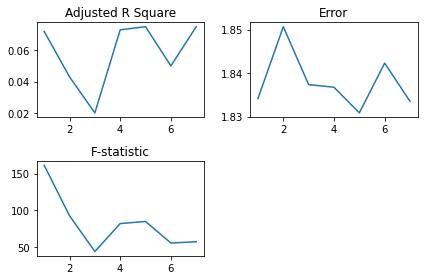

In [26]:
x = [1,2,3,4,5,6,7]
y1 = summary['Adjusted R']
y2 = summary['Error']
y3 = summary['F-statistic']

plot1 = plt.subplot2grid((4, 4), (0, 0), rowspan=2, colspan=2)
plot2 = plt.subplot2grid((4, 4), (0, 2), rowspan=2, colspan=2)
plot3 = plt.subplot2grid((4, 4), (2, 0), rowspan=2, colspan=2)
  
plot1.plot(x, y1)
plot1.set_title("Adjusted R Square")

plot2.plot(x, y2)
plot2.set_title("Error")

plot3.plot(x, y3)
plot3.set_title("F-statistic")


plt.tight_layout()
plt.show()

By compairing Adujusted R-square, Error and F-statistic of each model, the 1st model is the best choice.

The best prediction model for US is: Revenue = -2667.0947 + 520.1030 * Environmental Pillar Score

# Summary

prediction model is: Revenue = -772.5631 + 459.2224 * Environmental Pillar Score 

prediction model for Ireland is: Revenue = -12690 + 349.2537 * Environmental Pillar Score + 175.7489 * Governance Pillar Score

prediction model for UK is: Revenue = -3188.6513 + 300.1419 * Governance Pillar Score

prediction model for US is: Revenue = -2667.0947 + 520.1030 * Environmental Pillar Score

All the best perdiction model predicts the financial performance by the Environmental Pillar Score and Governance Pillar Score, without using the Social Pillar Score

Most of the models perdicts has a higher coefficient for the Environmental Pillar Score than the Governance Pillar Score,
only UK has a high coefficient for the Governance Pillar Score in the 4 models.

While in the other 3 models, US has the highest coefficient for the Environmental Pillar Score and Ireland has the lowest, and their coefficient for the Governance Pillar Score are relatively close.

So companies can focus more on their Environmantal Pillar Score, and companies in UK can focus more on their Governance Pillar Score to have a better financial result. As the Social Pillar Score is relatively less important than the Environmental and Governance Pillar Score